In [1]:
import scipy.io as sio    
import numpy as np
import pandas as pd
import glob,os
from matplotlib import pylab as plt
import CFS
import mrmr
import seaborn as sns

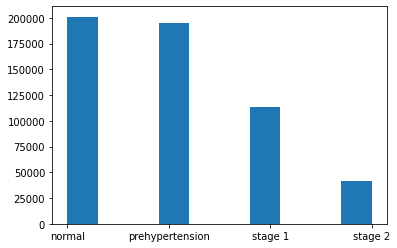

In [2]:
# load data
path = '/Users/lyuliangyi/Desktop/HKCOCHE/feature_selection/All_features'
file = glob.glob(os.path.join(path,'*.mat'))

label = []
for f in file:
    label.append(f[65:-4])
    
d={}
for i in range(len(file)):
    mat = sio.loadmat(file[i])
    d['mat_'+label[i]] = pd.DataFrame(mat['feature_person'],
                                     columns=['PTTp','PTTf','upTime','BfTime','DownTime',
                                              'FbTime','BbTime','CfSlope','BcSlope','CbSlope',
                                              'sys_vol','sys_notch_vol','notch_dia_vol','dia_vol','sys_dia_RI',
                                              'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR',
                                             'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5',
                                             'PSR6', 'PSR7', 'PSR8', 'SBP', 'DBP',
                                             'MBP'])
    
# classification of bp
for l in label:
    df = d['mat_'+l]
    df['class'] = ''
    for i in range(len(df)):
        if df.loc[i,'SBP'] >= 160 or df.loc[i,'DBP'] >= 100: # stage 2 hypertension 
            df.loc[i,'class'] = 'stage 2' 
        elif df.loc[i,'SBP'] >= 140 or df.loc[i,'DBP'] >= 90: # stage 1 hypertension 
            df.loc[i,'class'] = 'stage 1'
        elif df.loc[i,'SBP'] >= 120 or df.loc[i,'DBP'] >= 80: # prehypertension
            df.loc[i,'class'] = 'prehypertension'
        else:
            df.loc[i,'class'] = 'normal'
    d['mat_'+l] = df

# random select 50% data
d1 = []
sample_rate = 0.5

for l in label:
    m, n = d['mat_'+l].shape
    df = d['mat_'+l].sample(n=int(m*sample_rate),random_state=2023)
    d1.append(df)
df_sample = pd.concat(d1)
df_sample = df_sample.reset_index(drop=True)
df_sample = df_sample[['PTTp','PTTf','upTime','BfTime','DownTime',
                        'FbTime','BbTime','CfSlope','BcSlope','CbSlope',
                        'sys_vol','sys_notch_vol','notch_dia_vol','dia_vol','sys_dia_RI',
                        'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR',
                        'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5',
                        'PSR6', 'PSR7', 'PSR8','SBP', 'DBP', 'MBP','class']]

plt.hist(df_sample['class'])
plt.show()    

In [3]:
df_sample.describe()

,PTTp,PTTf,upTime,BfTime,DownTime,FbTime,BbTime,CfSlope,BcSlope,CbSlope,...,PSR2,PSR3,PSR4,PSR5,PSR6,PSR7,PSR8,SBP,DBP,MBP
count,551655.000000,551655.000000,551655.000000,551655.000000,551655.000000,551655.00000,551655.000000,551655.000000,551655.000000,551655.000000,...,551655.000000,551655.000000,551655.000000,551655.000000,551655.000000,551655.000000,551655.000000,551655.000000,551655.000000,551655.000000
mean,61.160811,47.146080,14.014730,38.302200,40.502100,44.53824,82.840186,0.004654,0.050253,0.009567,...,0.330288,0.198028,0.343387,0.983830,0.325804,0.198109,0.197452,128.640458,66.424222,87.162967
std,23.785419,23.409056,2.711216,4.632435,9.070797,12.89433,14.002776,0.002352,0.021460,0.004183,...,0.081933,0.073966,0.076734,0.193308,0.070118,0.052088,0.040454,19.458921,9.639957,11.478113
min,6.000000,-10.000000,-6.000000,1.000000,11.000000,-83.00000,0.000000,0.000000,0.000737,0.000002,...,0.069375,0.034738,0.109802,0.221535,0.063789,0.056934,0.056934,80.006643,50.051813,60.547556
25%,41.000000,28.000000,12.000000,35.000000,36.000000,36.00000,73.000000,0.002897,0.037445,0.007550,...,0.271787,0.152815,0.287700,0.856671,0.273949,0.162009,0.170867,113.669666,59.256883,78.280818
50%,69.000000,55.000000,14.000000,38.000000,40.000000,43.00000,81.000000,0.004945,0.052258,0.009707,...,0.320808,0.186072,0.339126,1.011191,0.321874,0.190529,0.196230,126.799295,64.630329,85.851654
75%,76.000000,62.000000,15.000000,41.000000,44.000000,52.00000,91.000000,0.006270,0.063821,0.011882,...,0.377802,0.222314,0.386531,1.138926,0.370222,0.226543,0.223069,142.185188,71.947366,94.415654
max,244.000000,221.000000,89.000000,136.000000,159.000000,666.00000,713.000000,0.111846,1.277414,0.075714,...,1.161565,1.122072,1.161565,1.784014,1.018182,1.000000,1.000000,179.990524,129.241500,139.765411


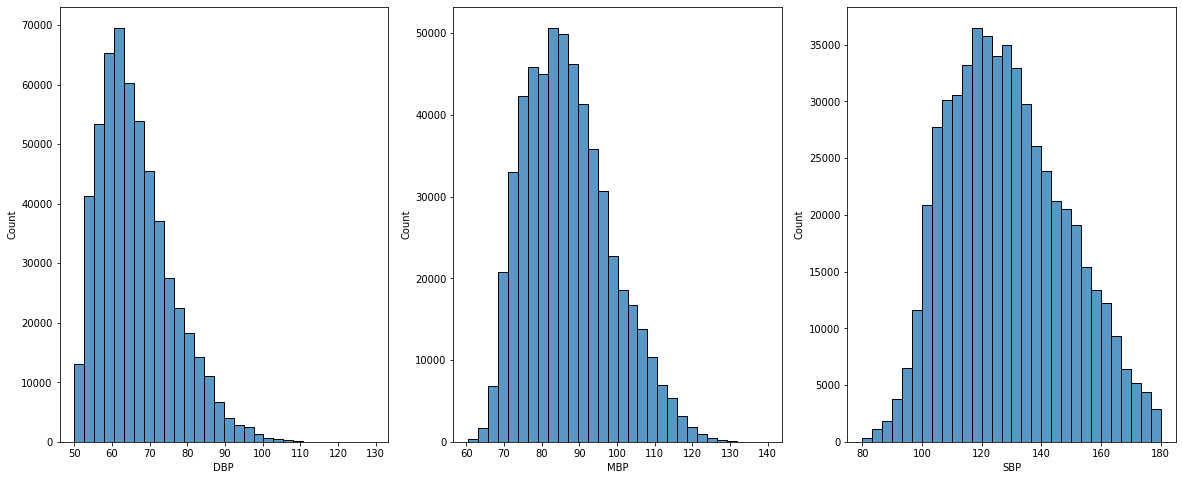

In [4]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
sns.histplot(df_sample['DBP'],bins=30,ax=axes[0])
sns.histplot(df_sample['MBP'],bins=30,ax=axes[1])
sns.histplot(df_sample['SBP'],bins=30,ax=axes[2])
plt.show()

In [5]:
# normalization
df_s = df_sample[['PTTp','PTTf','upTime','BfTime','DownTime',
                        'FbTime','BbTime','CfSlope','BcSlope','CbSlope',
                        'sys_vol','sys_notch_vol','notch_dia_vol','dia_vol','sys_dia_RI',
                        'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR',
                        'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5',
                        'PSR6', 'PSR7', 'PSR8','class']]

df_sample1 = df_s.drop('class', axis=1)
df_norm = (df_sample1 - df_sample1.min())/(df_sample1.max() - df_sample1.min())
df_norm['class'] = df_sample['class']
df_norm

,PTTp,PTTf,upTime,BfTime,DownTime,FbTime,BbTime,CfSlope,BcSlope,CbSlope,...,PSR,PSR1,PSR2,PSR3,PSR4,PSR5,PSR6,PSR7,PSR8,class
0,0.315126,0.333333,0.210526,0.274074,0.202703,0.166889,0.112202,0.027969,0.047128,0.163040,...,0.275904,0.166642,0.174393,0.086185,0.168905,0.507176,0.232035,0.073103,0.105885,normal
1,0.319328,0.337662,0.210526,0.274074,0.202703,0.166889,0.112202,0.030230,0.046400,0.163378,...,0.267777,0.173625,0.189596,0.089769,0.167461,0.533416,0.233552,0.077152,0.077152,normal
2,0.306723,0.329004,0.200000,0.266667,0.209459,0.166889,0.110799,0.026324,0.046214,0.145890,...,0.256806,0.183752,0.183752,0.092421,0.152378,0.559973,0.256738,0.083025,0.083025,normal
3,0.302521,0.329004,0.189474,0.274074,0.216216,0.165554,0.110799,0.034745,0.050346,0.137627,...,0.247460,0.193087,0.193087,0.097117,0.162071,0.553375,0.283572,0.088438,0.088438,normal
4,0.315126,0.337662,0.200000,0.259259,0.209459,0.168224,0.110799,0.034008,0.048581,0.152102,...,0.264425,0.176630,0.183311,0.090252,0.144982,0.540990,0.266330,0.078895,0.078895,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551650,0.298319,0.324675,0.189474,0.340741,0.209459,0.148198,0.105189,0.006136,0.033578,0.162148,...,0.182141,0.285059,0.319253,0.399697,0.257579,0.426875,0.317468,0.141774,0.141774,normal
551651,0.382353,0.402597,0.210526,0.333333,0.256757,0.150868,0.106592,0.000787,0.022479,0.086691,...,0.145266,0.373482,0.389478,0.478343,0.349401,0.493752,0.341734,0.193051,0.193051,normal
551652,0.373950,0.398268,0.200000,0.355556,0.229730,0.145527,0.105189,0.004633,0.031061,0.140787,...,0.179500,0.290185,0.325400,0.418529,0.262902,0.448269,0.271560,0.144746,0.144746,normal
551653,0.378151,0.398268,0.210526,0.325926,0.277027,0.150868,0.105189,0.007498,0.027418,0.098681,...,0.178688,0.291793,0.329769,0.436253,0.264571,0.428042,0.285005,0.145679,0.145679,normal


In [6]:
#FSCMRMR
X =df_norm[['PTTp','PTTf','upTime','BfTime','DownTime',
                        'FbTime','BbTime','CfSlope','BcSlope','CbSlope',
                        'sys_vol','sys_notch_vol','notch_dia_vol','dia_vol','sys_dia_RI',
                        'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR',
                        'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5',
                        'PSR6', 'PSR7', 'PSR8']]
y = df_norm['class']
y = y.squeeze()
features = ['PTTp','PTTf','upTime','BfTime','DownTime',
                        'FbTime','BbTime','CfSlope','BcSlope','CbSlope',
                        'sys_vol','sys_notch_vol','notch_dia_vol','dia_vol','sys_dia_RI',
                        'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR',
                        'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5',
                        'PSR6', 'PSR7', 'PSR8']
from mrmr import mrmr_classif
mrmr_result = mrmr_classif(X=X, y=y, K=len(features),return_scores=True)

100%|██████████| 28/28 [00:07<00:00,  3.94it/s]


In [7]:
df_mrmr = pd.DataFrame({'Features':mrmr_result[1].index, 'Weight_mrmr':mrmr_result[1].values})
df_mrmr.sort_values(by=['Weight_mrmr'], ascending = False)

,Features,Weight_mrmr
7,CfSlope,6665.092164
5,FbTime,3618.769131
15,sys_foot_RI,2653.946317
6,BbTime,2253.908862
18,HR,1988.574574
4,DownTime,1603.723493
2,upTime,1597.961671
19,PSR,1545.565591
25,PSR6,1269.374018
24,PSR5,1042.355968


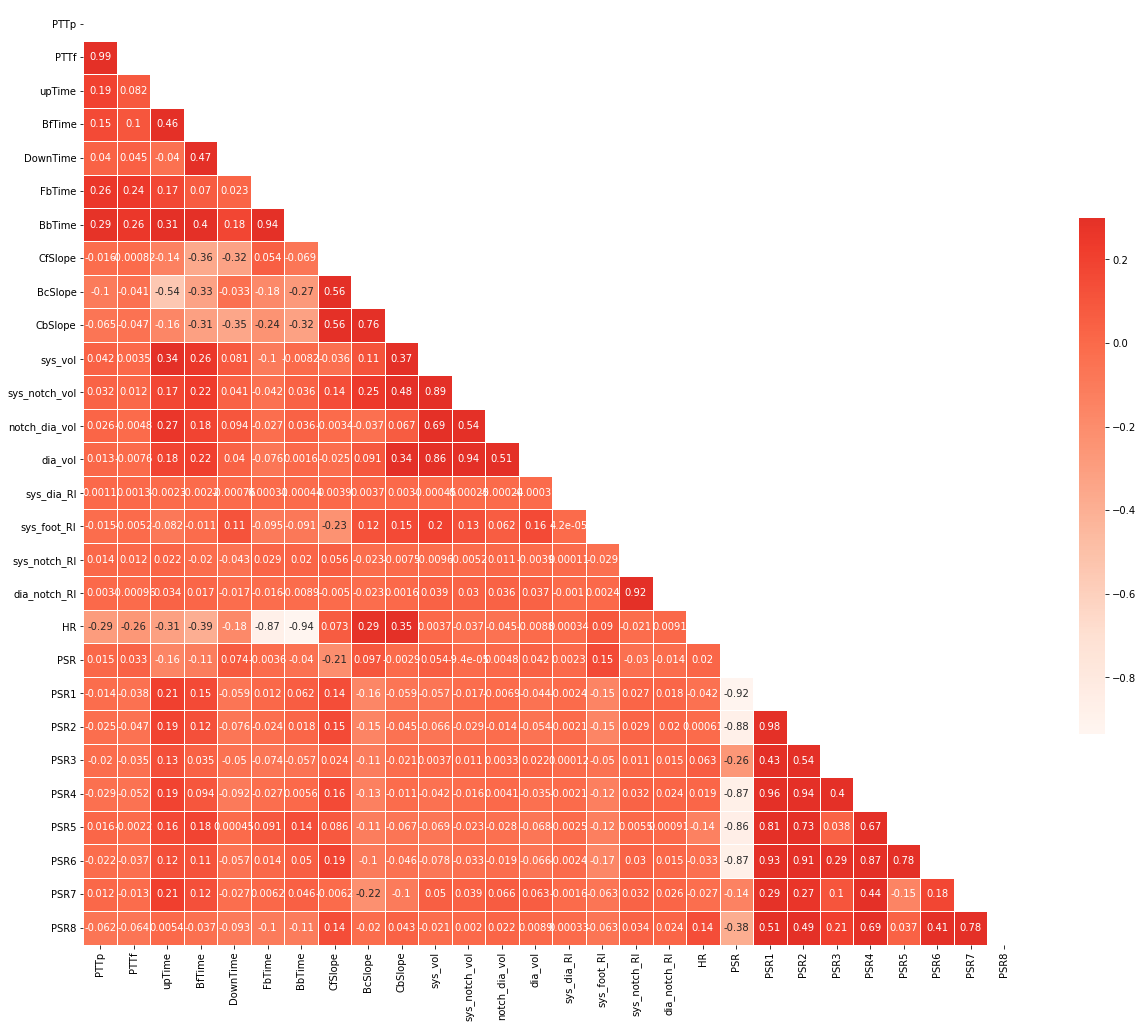

In [9]:
# corr 

corr = X.corr()
cmap = sns.color_palette("Reds",as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 19))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

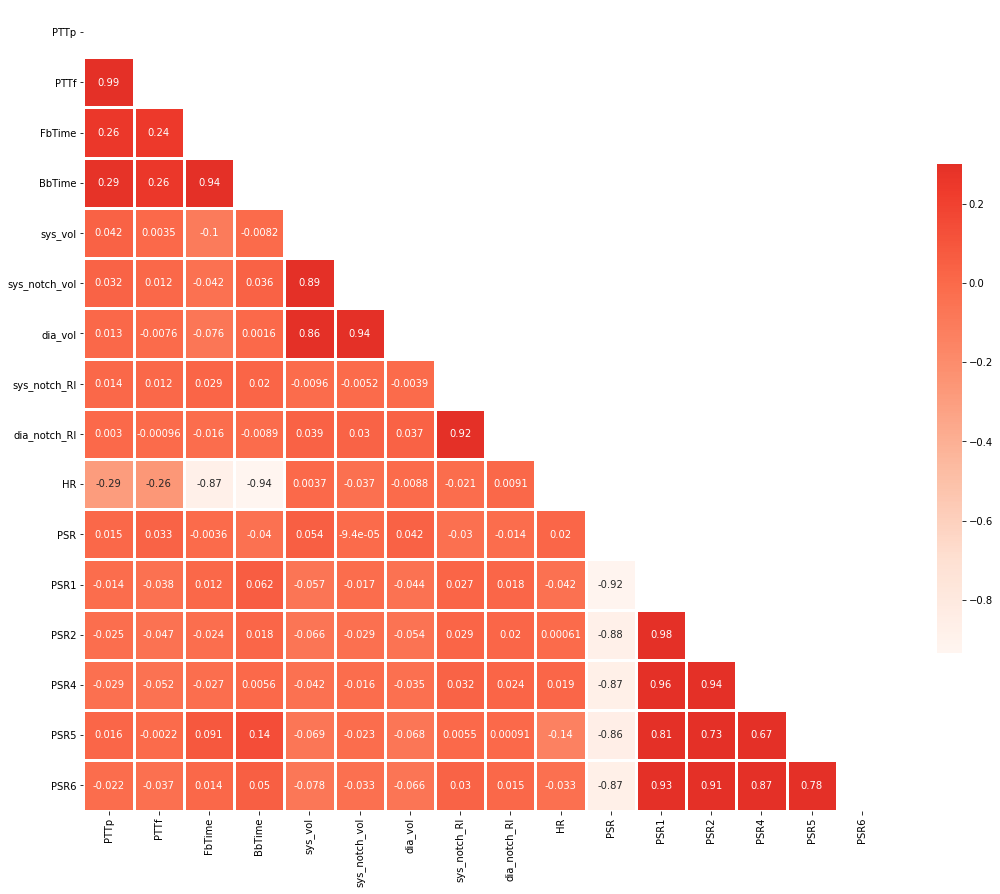

In [26]:
high_corr = df_norm[['PTTp','PTTf','FbTime','BbTime','sys_vol','sys_notch_vol',
                     'dia_vol','sys_notch_RI', 'dia_notch_RI','HR',
                     'PSR','PSR1','PSR2','PSR4','PSR5','PSR6']]
# high_corr = df_norm[['PTTp','PTTf','FbTime','BbTime','sys_vol','sys_notch_vol',
#                      'dia_vol','sys_notch_RI', 'dia_notch_RI','HR']]
corr = high_corr.corr()
cmap = sns.color_palette("Reds",as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=1.2, cbar_kws={"shrink": .5});

In [10]:
# variance threshold
features = ['PTTp','PTTf','upTime','BfTime','DownTime',
                        'FbTime','BbTime','CfSlope','BcSlope','CbSlope',
                        'sys_vol','sys_notch_vol','notch_dia_vol','dia_vol','sys_dia_RI',
                        'sys_foot_RI', 'sys_notch_RI', 'dia_notch_RI', 'HR', 'PSR',
                        'PSR1', 'PSR2', 'PSR3', 'PSR4', 'PSR5',
                        'PSR6', 'PSR7', 'PSR8']
score = []
for f in features:
    mean = np.mean(X[f])
    variance = np.var(X[f])
    t = variance
    score.append(t)

df_var = pd.DataFrame({'Features':features,
                      'Weight_var':score})
df_var.sort_values(by=['Weight_var'])

,Features,Weight_var
16,sys_notch_RI,0.000003
17,dia_notch_RI,0.000003
15,sys_foot_RI,0.000003
14,sys_dia_RI,0.000004
12,notch_dia_vol,0.000143
10,sys_vol,0.000207
8,BcSlope,0.000283
5,FbTime,0.000296
6,BbTime,0.000386
7,CfSlope,0.000442
